In [2]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objects as go
import math
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import chart_studio.plotly as py
import plotly.express as px
import numpy as np
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [21]:
data = px.data.gapminder()


In [13]:
data.head(5)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [18]:
fig = px.scatter(data[data["year"] == 2007],  x="gdpPercap", y="lifeExp", color = "continent", size = "pop", size_max=60, hover_name='country')

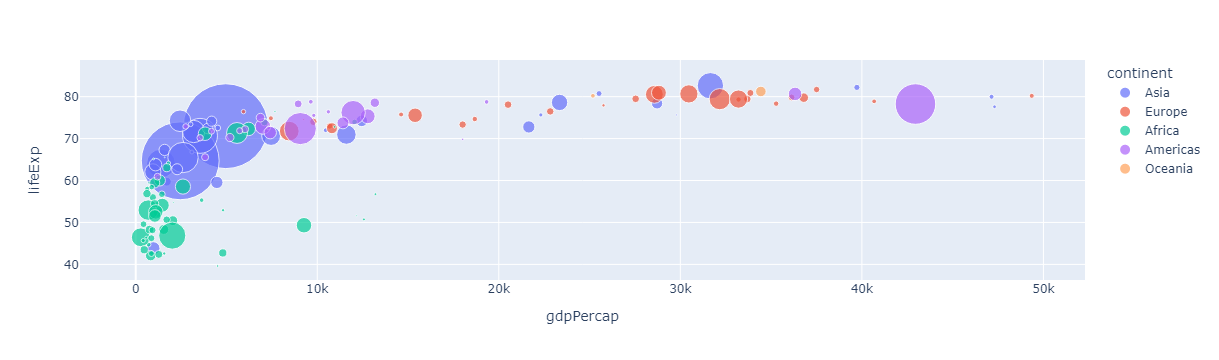

In [19]:
fig

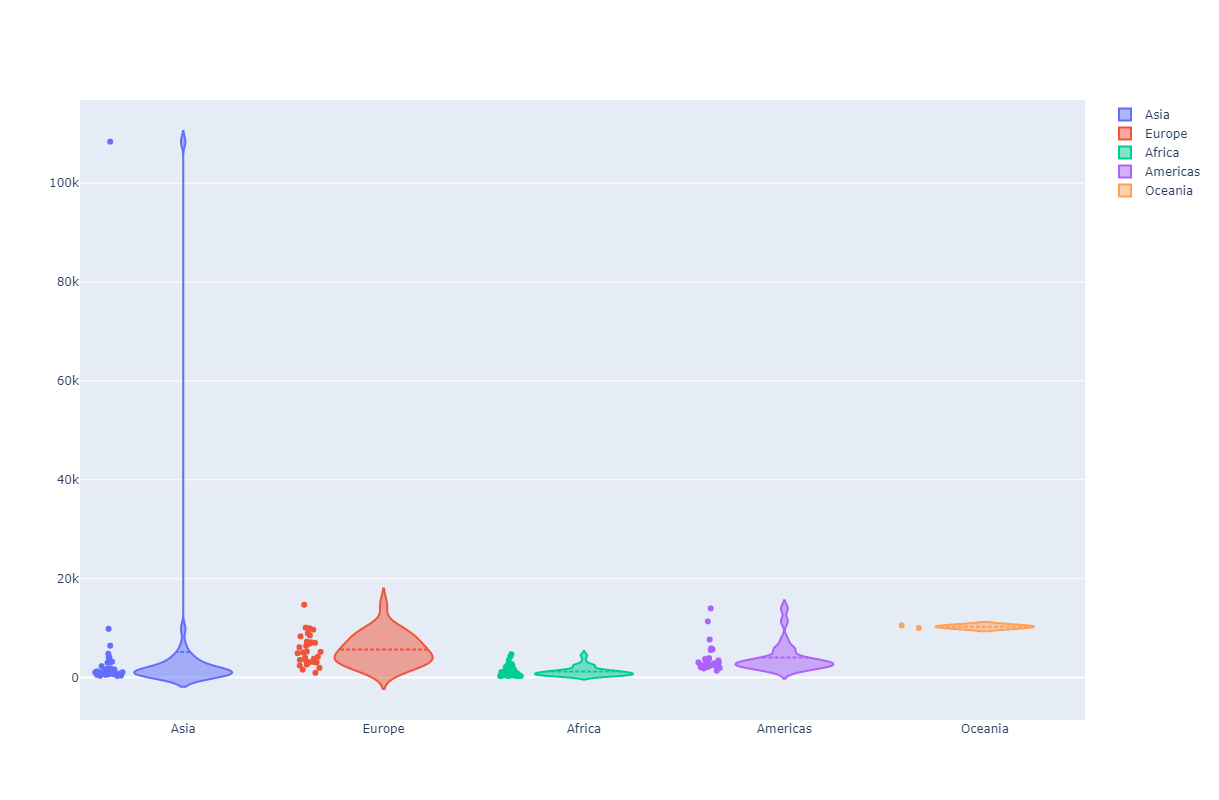

In [56]:
customdata = np.array(data['country'])
hovertemplate = ( 
    'Country: %{customdata}<br>' + 
    'gdpPercap: %{y:,.4f} <br>' +  
    '<extra></extra>')




fig = go.Figure()
con_list = data['continent'].unique().tolist()

years = data['year'].unique()
for index, year in enumerate(years):
    data_ = data[data['year'] == year]
    for item in con_list:
        fig.add_traces(go.Violin(x=data_[data_['continent']==item]['continent'],
                        visible=False,
                        y=data_[data_['continent'] == item]['gdpPercap'],
                        meanline_visible=True, name=item,points='all',hoveron='points', customdata=np.array(data_[data_['continent'] == item]['country']),hovertemplate=hovertemplate))

for i in range(5):
    fig.data[i].visible=True
fig.update_layout(
    autosize=False,
    width=1200,
    height=800)



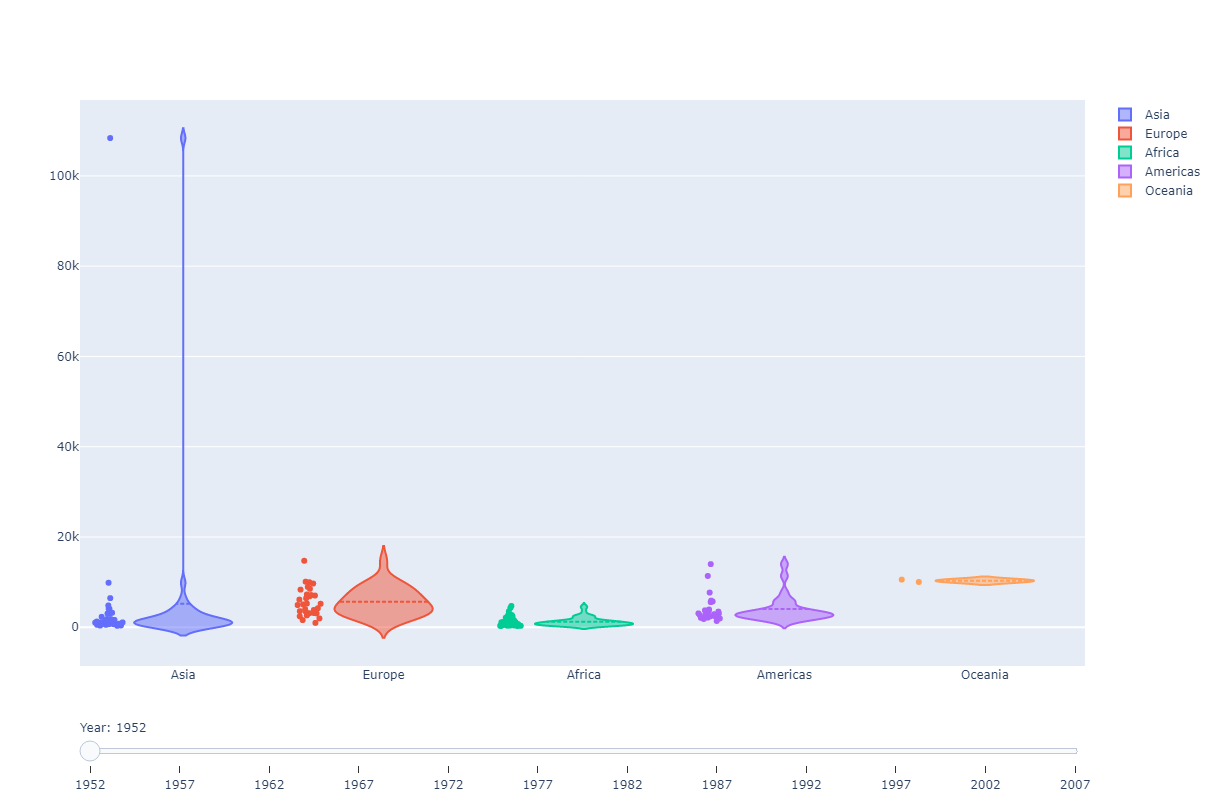

In [57]:
years = data['year'].unique()
steps = []
for i in range(int(len(fig.data)/5)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}, #create an array of bool value. 60 traces ==> 60 binary values
              {"title": "GDP Per Capital in the year: " + str(years[i])}],
        label = str(years[i]) # layout attribute
    )
    for j in range(5):
        step["args"][0]["visible"][i*5+j] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [32]:
len(fig.data)

60

In [51]:
str(data['year'].unique()[0])

'1952'